# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import norm
from matplotlib import pyplot
from scipy.stats import ttest_ind
from sklearn.utils import resample

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.

In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1- Is the distribution of body temperatures normal ?
#### In order to test the hypothesis Ho i.e "the temperature variable is distributed normally", I have used the normaltest() method defined in the stats module of the scipy library.  By definition when testing an hypotheis we evaluate the p-value. If the p-value > alpha (where alpha is the level of significance (0.05 - 0.01) of the test ) the result is not significant so Ho cannot be rejected. I tested both alpha = 0.05 (confidence level 95%) and alpha = 0.01 (confidence level 99%) and I got in both cases that the hypothesi Ho cannot be rejected. So the temperature distribution is normal 

In [5]:
temp = np.array(df['temperature'])


In [6]:
# find z-score and p-value 
# if 
k,p=stats.mstats.normaltest(temp) 
print(p,' = p , k = ',k)
# we use p value to test if the variable is normal or not
# if p < 0.05:
if p < 0.01:
  print('the temp varible is not normal')
else:
  print('the temp variable is distributed normally')

0.2587479863488254  = p , k =  2.703801433319203
the temp variable is distributed normally


#### Testing if the distribution is normal by using graphical methods 

98.24923076923075
0.730357778905038
130


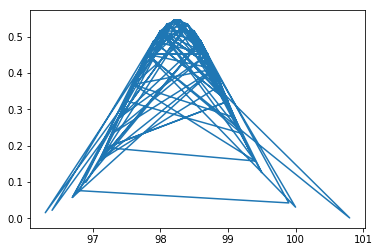

In [7]:
# find mean and std.dev of distribution
data_mean = temp.mean()
data_sd = temp.std()

print(data_mean)
print(data_sd)

# y-axis as the gaussian
y_axis = norm.pdf(temp, data_mean, data_sd)
print(len(y_axis))

# plot data
pyplot.plot(temp, y_axis)
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1160a7f98>]],
      dtype=object)

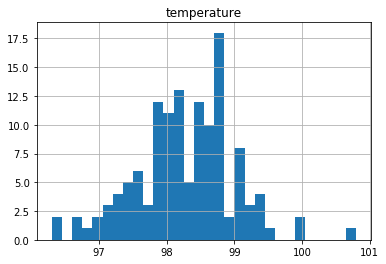

In [8]:
df.hist('temperature', bins=30)

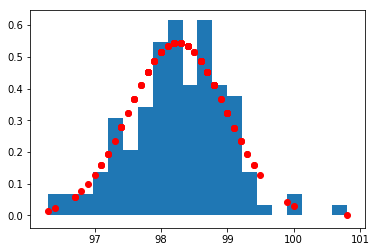

In [9]:
# find mean and std.dev of distribution
data_mean = temp.mean()
data_sd = temp.std()

# y-axis as the gaussian
y_axis = norm.pdf(temp, data_mean, data_sd)

# plot data
pyplot.hist(df['temperature'], bins=20, density=True, zorder=1)
pyplot.scatter(temp, y_axis, c='red',zorder=2)
pyplot.show()

### The graphics show how the data distribution actually has a bell shaped curve which means that the temperature (temp) variable approximates very well the normal distribution.

### 2- Is the sample size large? Are the observations independent? 

#### There is a connection between the sample size and the standard error.  The formula that connects those two quantities is :  standard_error = sigma / sqrt(n) where n is the sample size.  As the sample size increases the standard error will decrease. So if the standard error decreases we can say that a larger sample represents better a certain population thus we can be more confident about our sample. This confidence can be expressed through the zscore and we can use it so to express different levels of confidence. In this sense, a smaller error represents a larger confidence.  


In [10]:
# here I compute the standard_error
import math

standard_error = data_sd/math.sqrt(temp.size)
standard_error

0.06405661469519337

In [11]:
# for an unknown population size or a very large population size we can use the following formula 
# sample size = (Z-score)2 * StdDev*(1-StdDev) / (standard_error)2
# Valutare il sample size in rapporto al livello di precisione desiderato. 
# In questo caso, considerando che la 95% di una distribuzione normale è tra +/- 2 std del, il tuo risultato 
# ci dice che la tua stima della media della temperatura sarà in un intervallo di 2.6 gradi. 
# È un livello di precisione soddisfacente in questo contesto?
# Sull'indipendanza, un modo alternativo di porre la domanda è: la distribuzione delle temperature varia in modo 
# sistematico a seconda di altre caratteristiche delle tue osservazioni?
# Es uomini / donne? Anziani / giovani? Ecc. Qui potresti  paragonare le medie e varianze tra gruppi; 
# fare istogrammi  tra gruppi, oppure un t-test


In [12]:
zscore_90 = 1.645 # corresponding to 90% confidence
zscore_95 = 1.96 # corresponding to 95% confidence 
zscore_99 = 2.576 # corresponding to 99% confidence

sample_size = zscore_90*zscore_90 * data_sd*(1-data_sd)/(standard_error*standard_error)
sample_size

129.8755481405471

In [13]:
# the sample size is enough if we want to have a 90% confidence.
temp.shape

(130,)

In [14]:
# The equation above shows that given the standard error, we can say with a level of confidence of 90% 
# that the sample is large(enough).


###  Are the observations independent?
#### For this point I have been using a t-test to check the independence between the men and women observations.
#### My H_zero for this test is "Those are the same distributions (no difference between the sample means)." thus the observations are not indepenent
#### My alternativa hypotheis is "There is some difference between the sample means" so H_zero can be rejected. 


In [15]:
# take the data for men and women
dati_men = df[df['gender'] == 'M']
dati_women = df[df['gender'] == 'F']

# perform the test by 
stat, p = ttest_ind(dati_men['temperature'], dati_women['temperature'])

print('Statistics=%.3f, p=%.3f' % (stat, p)) # interpret
alpha = 0.05


if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.285, p=0.024
Different distributions (reject H0)


#### the t-test shows that the two distributions are different and this means that the observations are independent.

### 3- Is the true population mean really 98.6 degrees F? 

#### For answering this question I need to consider the mean and the standard error i have already computed above. The difference between the mean which is 98.249 and the required mean 98.6 is 0.35 degrees while my standard error is 0.062 . By using the formula ((x-mean) / sigma) I can calculate the standard variable and use it for evaluating if the true mean is 98.6 degrees F. 

In [21]:
z_standard = 0.35 / 0.062
z_standard

5.64516129032258

#### My standard variable z_standard is equal to 5.64 . Here we are looking for true mean to be different from 98.6  so either mean > 98.6 or mean < 98.6. This means also that we have to consider both parts of the bell shaped curve of standard variable distribution. So we have to check that P(x < 5.64) and  P(x > 5.64) where x is the random variable. Finally, by checking the table of quantiles of the standard distribution we see that the value 5.64 corresponds to  a very improbable probability for the 98.6 degrees to be the real mean. In order to formulate the problem as an hypothesis test then I can say that my zero hypothesis is H0 : "mean = 98.6" while my alternative hypothesis is Ha : "mean != 98.6". Given that the probability I calculated above is very very small I can say that I can reject the H0. So the mean is different from 98.6 degrees F.


### The different point of the section three are as below : First, try a bootstrap hypothesis test.


#### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
#### In this situation, is it appropriate to use the tt or zz statistic?
#### If we have more than 120 observations (in this case we have 130) using a z-score or a t-score is the same


#### Now try using the other test. How is the result be different? Why? 
#### The result does not change because we have a sample of more than 120 observations. 


### 4 - Draw a small sample of size 10 from the data and repeat both frequentist tests.

#### Which one is the correct one to use?
#### What do you notice? What does this tell you about the difference in application of the tt and zz statistic? 

In [26]:
### Here I'm using a sample of 10 values . 
bootstrap = resample(temp, replace=True, n_samples=10, random_state=1)
print('Bootstrap Sample: %s' % bootstrap)

Bootstrap Sample: [98.3 98.  97.6 98.7 97.7 98.  98.3 98.5 98.9 98.7]


In [33]:
b_mean = bootstrap.mean()
b_std = bootstrap.std()


In [34]:
b_mean
b_std

0.41725292090050325